In [1]:
import numpy as np
from astropy import units as u 
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from astropy.io import ascii

In [2]:
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord

data = ascii.read("Messier-objects-details-Sheet1-2.csv")
stars = ascii.read("hygfull.csv")

In [3]:
#a function to return separation in degrees
def separation(ra1, dec1, ra2, dec2):   
    c1 = SkyCoord(ra = ra1*u.degree, dec = dec1*u.degree)
    c2 = SkyCoord(ra = ra2*u.degree, dec = dec2*u.degree)
    sep = c1.separation(c2).degree
    return sep    

In [70]:
def plotMessier(x, y, c):
    raM = coord.Angle(x)
    raM.degree
    raM = raM.wrap_at(180*u.degree)
    decM = coord.Angle(y*u.degree)
    fig = plt.figure(figsize = (14, 12))
    ax = fig.add_subplot(111, projection = "mollweide")
    ax.text(raM.radian + 0.08, decM.radian + 0.08, 'M' + str(c+1), fontsize=12, color='blue', ha='left', va='bottom', alpha=0.8)
    ax.set_title('Position of M' + str(c+1) + ' in Molleweild view', fontsize = 20)
    ax.scatter(raM.radian, decM.radian, s = 200)

In [5]:
#read Messier and Stars data

ra = coord.Angle(data['RA'])
ra.degree
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(data['DEC']*u.degree)
msize = data['Mag']
Msize = np.array(10**(msize/(-2.5)))*10000

raS = coord.Angle(stars['RA']*u.radian)
raS.degree
raS = raS.wrap_at(180*u.degree)
decS = coord.Angle(stars['Dec']*u.degree)
mag = stars['Mag']
mag = np.array(10**(-0.4*mag))*100

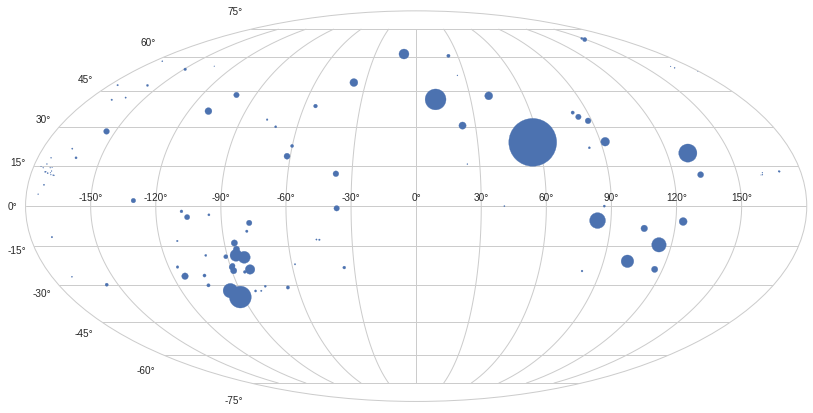

In [71]:
#plotting all messier objects in sky
fig = plt.figure(figsize = (14,12))
ax = fig.add_subplot(111, projection = "mollweide")
ax.scatter(ra.radian, dec.radian, s=Msize)

Enter messier number (1 to 110): 1
Messier data: 
NGC:  1952 
Constellation:  TAU 
Coordinates:  05h 34m 31.94s 22.0145 
Magnitude:  8.4


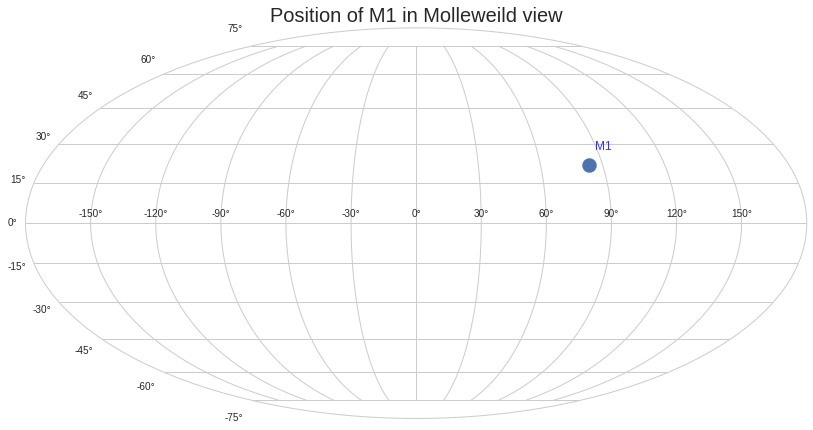

In [78]:
c = int(input("Enter messier number (1 to 110): "))-1
if (c >= 0 & c < 111):
    print("Messier data: \nNGC: ", data['NGC'][c], "\nConstellation: ", data['CON'][c], "\nCoordinates: ", data['RA'][c], data["DEC"][c], "\nMagnitude: ", data['Mag'][c])
    plotMessier(data['RA'][c], data['DEC'][c], c)
    ra0 = ra.degree[c]
    dec0 = dec.degree[c]
    
else:
    print("Wrong input")

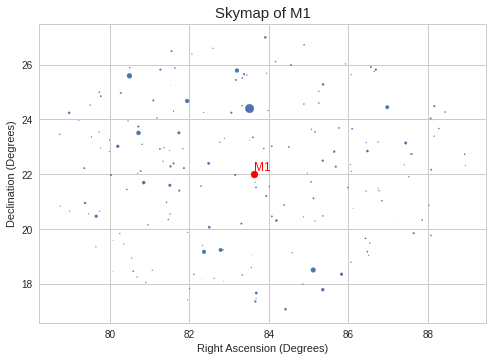

In [80]:
#plotting the stars nearby Messier object
n = 0
nearby = []
dist = separation(raS.degree, decS.degree, ra0, dec0)
min_sep = 5.00
for d in dist:
    if d < min_sep:
        nearby.append([raS.degree[n], decS.degree[n], d, mag[n]*20])
    n += 1

x = []
y = []
m = []
for k in nearby:
    x.append(k[0])
    y.append(k[1])
    m.append(k[3])

plt.style.use('seaborn-whitegrid')
plt.scatter(x, y, s=m)
plt.scatter(ra0, dec0, c='red')
plt.xlabel("Right Ascension (Degrees)")
plt.ylabel("Declination (Degrees)")
plt.text(ra0, dec0, 'M' + str(c+1), fontsize=12, color='red', ha='left', va='bottom', alpha=1)
plt.title('Skymap of M' + str(c+1), fontsize = 15)
plt.show()

